<a href="https://colab.research.google.com/github/javedhassans/SocialNetworkAnalysisDtuchElections/blob/main/CrowdTangle2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# importing dependecies to merge files
import os
import glob
import pandas as pd
os.chdir("/content/drive/MyDrive/Colab Notebooks/Data/TLS/")

In [3]:
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

In [4]:
all_filenames

['2021-03-27-10-37-26-CET-search-csv-export.csv',
 '2021-04-01-10-36-33-CEST-search-csv-export.csv',
 '2021-04-01-10-31-55-CEST-search-csv-export.csv']

In [5]:
#combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
# #export to csv
# combined_csv.to_csv( "combined_csv.csv", index=False, encoding='utf-8-sig')

In [6]:
combined_csv.shape

(2616, 41)

In [7]:
# will use to remove null columns
len_of_data = combined_csv.shape[0]

In [8]:
# creating filter to identify colums that are null more than 95%
is_null_filter = combined_csv.isnull().sum()
is_null_filter[is_null_filter > (0.95*len_of_data)]

Sponsor Id          2616
Sponsor Name        2616
Sponsor Category    2616
dtype: int64

In [9]:
# creating list that is used to drop these columns
cols_remove = list(is_null_filter[is_null_filter > (0.95*len_of_data)].index)
cols_remove

['Sponsor Id', 'Sponsor Name', 'Sponsor Category']

In [10]:
# droping the colums
df_clean = combined_csv.drop(cols_remove, axis=1)

In [11]:
# Droping additonal colums that seems duplicate
# Total Interactions is duplicate column
# Post created and Post creatd time is Duplicate column
# 'Total Views For All Crossposts' is 0 for all
drop_list= ['Total Interactions (weighted  —  Likes 1x Shares 1x Comments 1x Love 1x Wow 1x Haha 1x Sad 1x Angry 1x Care 1x )',
            'Post Created Time','Page Created','Total Views For All Crossposts','Post Created']
df_clean.drop(drop_list,axis=1,inplace=True)

In [12]:
# changing the colums type
# changing Total Intractions to numeric type by removing ','
# Converting Post Created Date to Date format
df_clean['Total Interactions'] = df_clean['Total Interactions'].astype(str).str.replace(',', '').apply(pd.to_numeric)
df_clean['Post Created Date'] = pd.to_datetime(pd.to_datetime(df_clean['Post Created Date']).apply(lambda x: x.strftime('%Y-%m-%d')))

In [13]:
df_clean.shape

(2616, 33)

In [14]:
df_clean.columns

Index(['Page Name', 'User Name', 'Facebook Id', 'Page Category',
       'Page Admin Top Country', 'Page Description', 'Likes at Posting',
       'Followers at Posting', 'Post Created Date', 'Type',
       'Total Interactions', 'Likes', 'Comments', 'Shares', 'Love', 'Wow',
       'Haha', 'Sad', 'Angry', 'Care', 'Video Share Status', 'Is Video Owner?',
       'Post Views', 'Total Views', 'Video Length', 'URL', 'Message', 'Link',
       'Final Link', 'Image Text', 'Link Text', 'Description',
       'Overperforming Score'],
      dtype='object')

In [15]:
df_clean.isnull().sum()

Page Name                    0
User Name                 1391
Facebook Id                  0
Page Category                0
Page Admin Top Country    1368
Page Description          1102
Likes at Posting           776
Followers at Posting      1681
Post Created Date            0
Type                         0
Total Interactions           0
Likes                        0
Comments                     0
Shares                       0
Love                         0
Wow                          0
Haha                         0
Sad                          0
Angry                        0
Care                         0
Video Share Status        2020
Is Video Owner?              0
Post Views                   0
Total Views                  0
Video Length              2020
URL                          0
Message                    275
Link                       122
Final Link                2028
Image Text                2407
Link Text                  422
Description                634
Overperf

In [16]:
df_clean['URL'].value_counts()

https://www.facebook.com/revrouwlutie/posts/168594501687752                       2
https://www.facebook.com/groups/1627335444184775/permalink/2615590765359233       2
https://www.facebook.com/groups/294068102010884/permalink/411358216948538         2
https://www.facebook.com/groups/563756084573818/permalink/589920511957375         2
https://www.facebook.com/FVDBreda/posts/1060802114393808                          2
                                                                                 ..
https://www.facebook.com/stephanie.pietz/posts/3204460389645006                   1
https://www.facebook.com/243527245027/posts/10157652238055028                     1
https://www.facebook.com/CosmicGoodyBag/posts/2643109052591848                    1
https://www.facebook.com/feestdjmaurice/posts/2719591061596139                    1
https://www.facebook.com/conservativemediacommunications/posts/775515963284515    1
Name: URL, Length: 1846, dtype: int64

In [17]:
df_clean['Total Interactions'].describe()

count     2616.000000
mean       168.870795
std        759.257255
min          0.000000
25%          1.000000
50%          7.000000
75%         37.000000
max      11719.000000
Name: Total Interactions, dtype: float64

In [21]:
# numeric columns
num_cols = df_clean.select_dtypes(exclude='object')
cat_cols = df_clean.select_dtypes(include='object')

In [22]:
num_cols.columns

Index(['Facebook Id', 'Likes at Posting', 'Followers at Posting',
       'Post Created Date', 'Total Interactions', 'Likes', 'Comments',
       'Shares', 'Love', 'Wow', 'Haha', 'Sad', 'Angry', 'Care', 'Post Views',
       'Total Views', 'Overperforming Score'],
      dtype='object')

In [24]:
cat_cols.columns

Index(['Page Name', 'User Name', 'Page Category', 'Page Admin Top Country',
       'Page Description', 'Type', 'Video Share Status', 'Is Video Owner?',
       'Video Length', 'URL', 'Message', 'Link', 'Final Link', 'Image Text',
       'Link Text', 'Description'],
      dtype='object')

In [20]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2616 entries, 0 to 769
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Page Name               2616 non-null   object        
 1   User Name               1225 non-null   object        
 2   Facebook Id             2616 non-null   int64         
 3   Page Category           2616 non-null   object        
 4   Page Admin Top Country  1248 non-null   object        
 5   Page Description        1514 non-null   object        
 6   Likes at Posting        1840 non-null   float64       
 7   Followers at Posting    935 non-null    float64       
 8   Post Created Date       2616 non-null   datetime64[ns]
 9   Type                    2616 non-null   object        
 10  Total Interactions      2616 non-null   int64         
 11  Likes                   2616 non-null   int64         
 12  Comments                2616 non-null   int64    

### Plotting


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

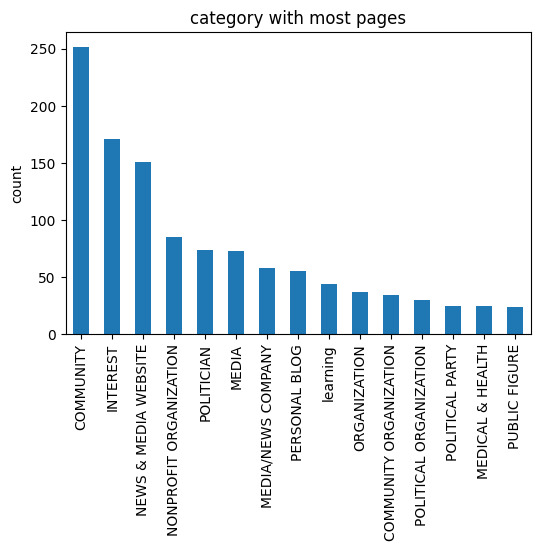

In [ ]:
plt.figure(figsize=(6,4),dpi=100)
# df_clean['Page Category'].value_counts()[:15].plot(kind='bar')
not_none = df_clean[df_clean['Page Category']!= 'none']
not_none['Page Category'].value_counts()[:15].plot(kind='bar')
plt.title('category with most pages')
plt.ylabel('count')
plt.show()

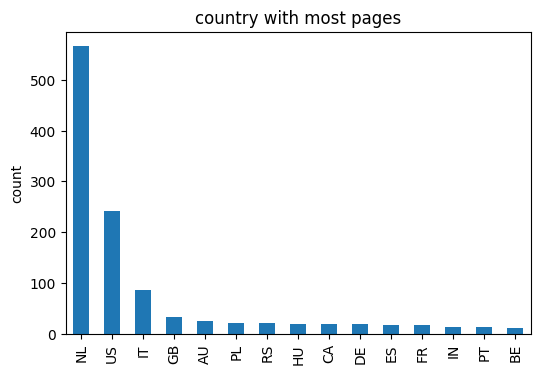

In [ ]:
plt.figure(figsize=(6,4),dpi=100)
df_clean['Page Admin Top Country'].value_counts()[:15].plot(kind='bar')
plt.title('country with most pages')
plt.ylabel('count')
plt.show()

### Vedio sharing status and Page Admin top country

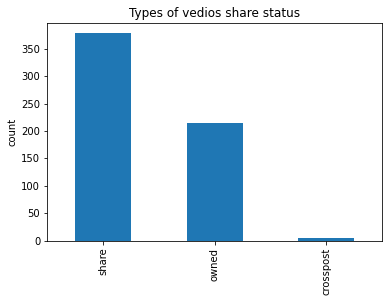

In [ ]:
df_clean['Video Share Status'].value_counts().plot(kind='bar')
plt.title('Types of vedios share status')
plt.ylabel('count')
plt.show()

In [ ]:
pivot_table = pd.crosstab(df_clean['Page Admin Top Country'],df_clean['Video Share Status'],margins=True)
sorted_pivot_table = pivot_table.sort_values(by='All',ascending=False)[1:10]
sorted_pivot_table

Video Share Status,crosspost,owned,share,All
Page Admin Top Country,,,,
NL,4,139,34,177
US,0,23,9,32
IT,0,4,4,8
BE,0,7,0,7
AU,0,4,2,6
DE,0,6,0,6
CH,0,2,3,5
CL,0,1,2,3
CO,0,2,0,2


<Figure size 6000x3600 with 0 Axes>

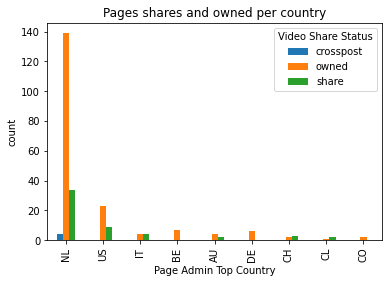

In [ ]:
plt.figure(figsize=(10,6),dpi=600)
sorted_pivot_table.drop(['All'],axis=1).plot(kind='bar')
# sorted_pivot_table.drop(['All','other'],axis=1, inplace=True).plot(kind='bar')
plt.ylabel('count')
plt.title('Pages shares and owned per country')
plt.show()

In [34]:
df_clean['Type'].value_counts()

YouTube                668
Link                   641
Native Video           499
Photo                  495
Video                  138
Live Video Complete     97
Status                  78
Name: Type, dtype: int64

In [17]:
combined_csv.columns

Index(['Page Name', 'User Name', 'Facebook Id', 'Page Category',
       'Page Admin Top Country', 'Page Description', 'Page Created',
       'Likes at Posting', 'Followers at Posting', 'Post Created',
       'Post Created Date', 'Post Created Time', 'Type', 'Total Interactions',
       'Likes', 'Comments', 'Shares', 'Love', 'Wow', 'Haha', 'Sad', 'Angry',
       'Care', 'Video Share Status', 'Is Video Owner?', 'Post Views',
       'Total Views', 'Total Views For All Crossposts', 'Video Length', 'URL',
       'Message', 'Link', 'Final Link', 'Image Text', 'Link Text',
       'Description', 'Sponsor Id', 'Sponsor Name', 'Sponsor Category',
       'Total Interactions (weighted  —  Likes 1x Shares 1x Comments 1x Love 1x Wow 1x Haha 1x Sad 1x Angry 1x Care 1x )',
       'Overperforming Score'],
      dtype='object')

#### Network analysis Graphs

In [16]:
import csv
from operator import itemgetter
import networkx as nx
from networkx.algorithms import community

In [39]:
nodelist = pd.DataFrame({'pagename':df_clean['Page Name'],'Type':df_clean['Type'], 'AdminCountry':df_clean['Page Admin Top Country'],
                          'Category':df_clean['Page Category']})

In [55]:
nodelist.to_csv('/content/drive/MyDrive/Colab Notebooks/Data/TLS/GephiData/combnodes.csv',index=False)

In [50]:
edges = pd.DataFrame({'source':nodelist.iloc[:,0], 'target':nodelist.iloc[:,1]})

In [53]:
edges.to_csv('/content/drive/MyDrive/Colab Notebooks/Data/TLS/GephiData/combedges.csv',index=False)

In [58]:
df_clean['Page Name'].value_counts()[:10]

Dutch Patriots                                      62
ReVrouwLutie                                        58
Wybren van Haga                                     48
Be4Truth                                            38
Stem Nederland Terug                                36
Soevereine Staat Eurostaete                         36
Voor Inwoners Bunschoten-Spakenburg en Omstreken    30
ABC                                                 30
Forum voor Democratie geluid -FVD geluid            28
‼️ Nederland in opstand ‼️                          28
Name: Page Name, dtype: int64